In [68]:
#import files
import numpy as np
import pandas as pd

In [69]:
#read_data

loan_data = pd.read_csv("F:\\upgrad\\LendingClubCaseStudy\\loan\\loan.csv", sep=",", encoding="ISO-8859-1", low_memory=False)
loan_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [70]:
#set max columns to cover all the columns
pd.set_option('display.max_columns', 500)
loan_data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [71]:
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [72]:
round(loan_data.isnull().sum()/len(loan_data.index), 2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [73]:
#identifying the missing columns with more than 90% of the misising
miss_cols = loan_data.columns[100*(loan_data.isnull().sum()/len(loan_data.index)) > 90]
print(miss_cols)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [74]:
#drop the missing columns identified
loan_data = loan_data.drop(columns = miss_cols, axis=1)
print(loan_data.shape)

(39717, 55)


In [75]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [76]:
#summarising the columns
(loan_data.isnull().sum()/len(loan_data.index))*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [77]:
#2 columns have the huge range of missing values namely - mths_since_last_delinq and desc. 
#extracting only these columns in order to impute or delete them
loan_data.loc[:,['desc','mths_since_last_delinq']].head(15)

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0
5,NaN,NaN
6,Borrower added on 12/18/11 > I am planning o...,NaN
7,Borrower added on 12/16/11 > Downpayment for...,NaN
8,Borrower added on 12/21/11 > I own a small h...,NaN
9,Borrower added on 12/16/11 > I'm trying to b...,NaN


In [78]:
#1. Desc just contain the customer feedback/ queries from the customers, discarding this column as it does not contribute to the 
#goal of the problem statement
#2. Mths_since_last_delinq represents the number of months since the borrowers last delinquency is decided to be discarded as this
# information at the time of loan application will not be available

loan_data = loan_data.drop(columns=['desc','mths_since_last_delinq'],axis =1)
loan_data.shape


(39717, 53)

In [79]:
# summarising data again, we have -
(loan_data.isnull().sum()/len(loan_data.index))*100


id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [80]:
#observing the results obtained in the above cell, 
#we now observe that the other missing data column-wise can be ignored as they are less than 10%
#step 2: checking the row-wise missing data

loan_data.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [81]:
#checking  if there are more than 5 missing values in rows
#len(loan[loan.isnull().sum(axis=1) > 5].index)
len(loan_data[loan_data.isnull().sum(axis=1) >5].index)

0

In [82]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [83]:
loan_data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [84]:
# int_rate, revol_util -> interest rateon the loan is charactertype,--> removing % symbol from the data

#loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split('%')[0]))

loan_data['int_rate']=loan_data['int_rate'].apply(lambda x: pd.to_numeric(x.split('%')[0]))



In [85]:
loan_data.int_rate

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

In [86]:
loan_data.shape


(39717, 53)

In [87]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null float64
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_p

In [88]:
# filtering the variables who has the prerequisite of loan - approval like delinq_2yrs ,earliest_cr_line, inq_last_6mths etc
dependent_vars =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d"]
dependent_vars

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d']

In [89]:
#removing these dependent variables as this might further affect our analysis
loan_data = loan_data.drop(columns=dependent_vars, axis =1)

In [90]:
loan_data.shape
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 33 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null float64
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_p

In [91]:
#filtering out the variables that do not contribute to the problem statement - eg: zip code, addr_state, url
# as title foeld is derived from purpose we can remove that category too

loan_data = loan_data.drop(columns=["addr_state","zip_code","url","title"], axis=1)
loan_data.info()
loan_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 29 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null float64
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_p

(39717, 29)

In [92]:
# looking into the unique category count of the target variable:

loan_data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [93]:
# removing out the current loan_status 
# filtering only fully paid or charged-off
loan_data = loan_data[loan_data['loan_status'] != 'Current']
loan_data['loan_status'] = loan_data['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
loan_data['loan_status'] = loan_data['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
loan_data['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

In [94]:
#starting with the analysis 
#checking the default rate :

round(np.mean(loan_data['loan_status']),4)

0.1459

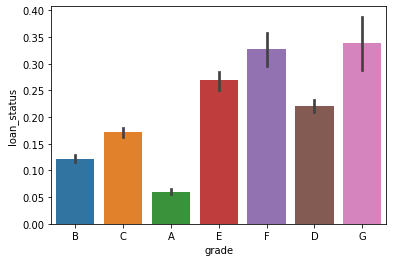

In [95]:
# now that the default rate is calculated, let us understand the categories by plotting a graph of the the categorical variables
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x="grade",y="loan_status",data=loan_data)
plt.show()

In [96]:
# as we have multiple categorical variables, let us define a function
def cat_var_plot(variable):
    plt.figure(figsize=(16,6))
    sns.barplot(x=variable,y="loan_status",data=loan_data)
    plt.show()
    

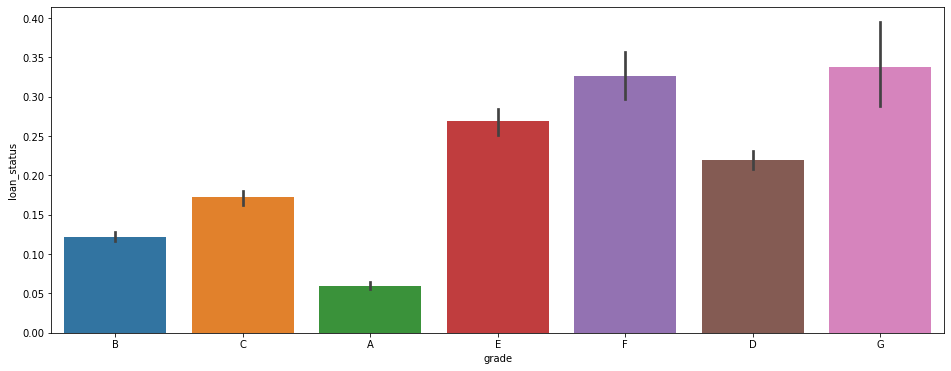

In [97]:
cat_var_plot('grade')

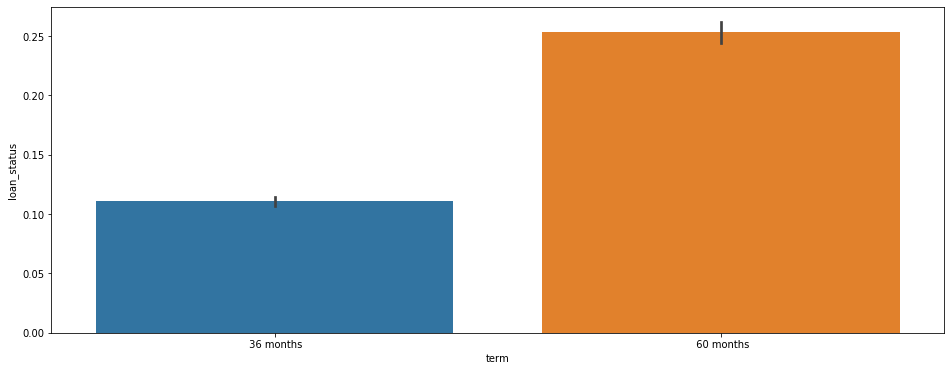

In [98]:
cat_var_plot('term')

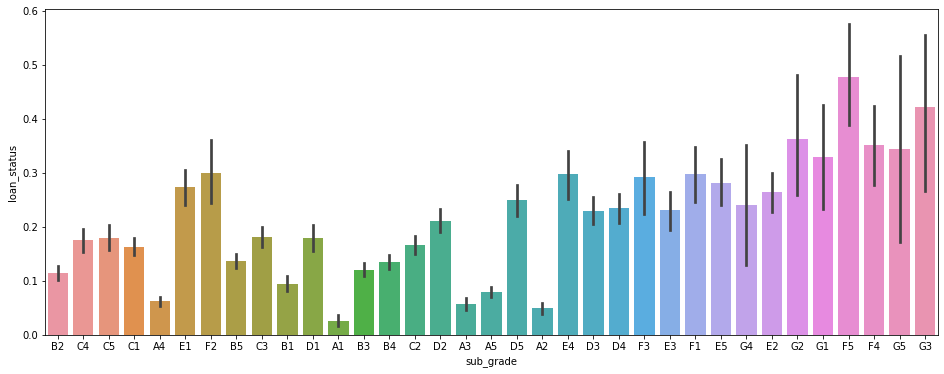

In [99]:
cat_var_plot('sub_grade')

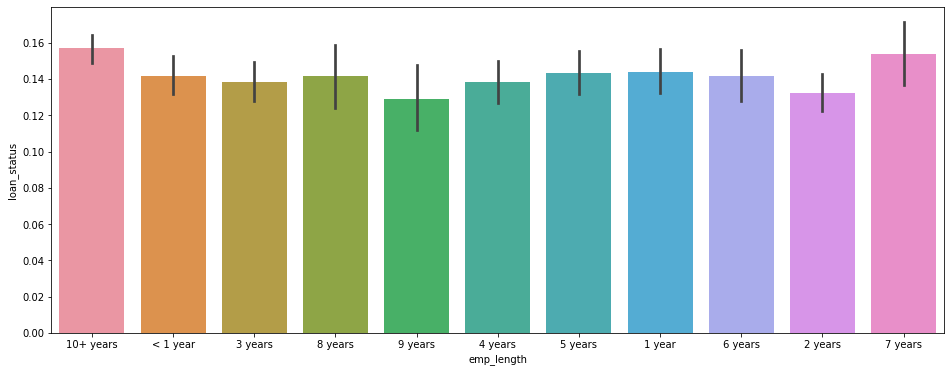

In [100]:
cat_var_plot('emp_length')

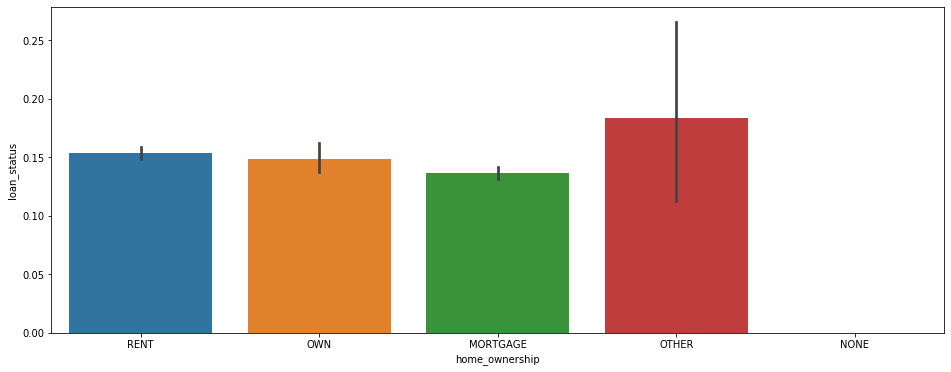

In [101]:
cat_var_plot('home_ownership')

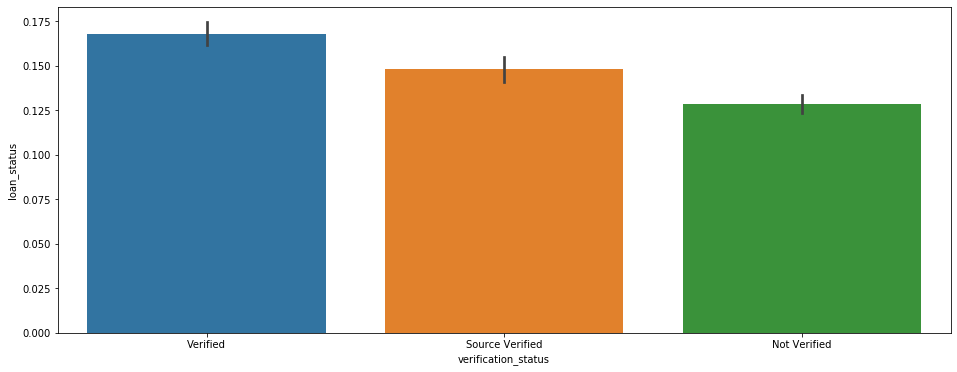

In [102]:
cat_var_plot('verification_status')

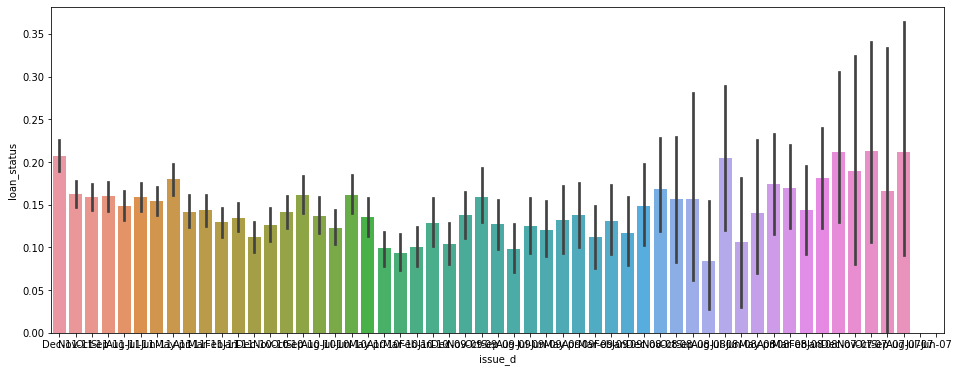

In [103]:
cat_var_plot('issue_d')

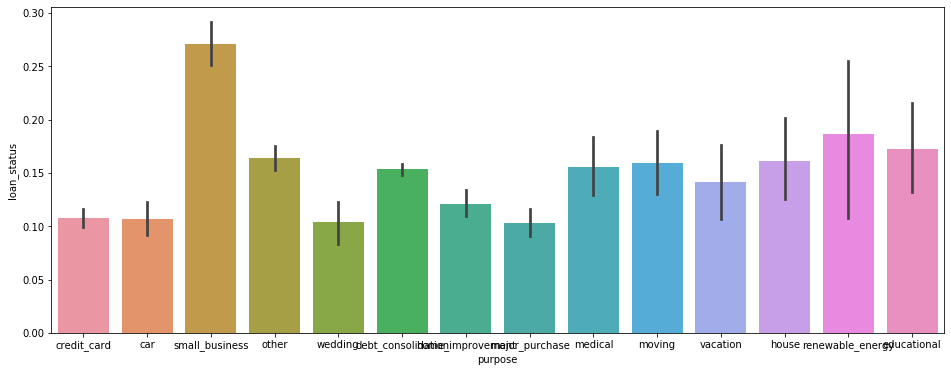

In [104]:

cat_var_plot('purpose')


In [105]:
#as we have the issue_d , we can split that into month and year
from datetime import datetime
loan_data["issue_d"] = loan_data["issue_d"].apply(lambda x: datetime.strptime(x,'%b-%y'))
# from datetime import datetime
# df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [106]:
# extracting month and year from issue_date
loan_data['month'] = loan_data['issue_d'].apply(lambda x: x.month)
loan_data['year'] = loan_data['issue_d'].apply(lambda x: x.year)


In [107]:
loan_data['month']

0        12
1        12
2        12
3        12
5        12
         ..
39712     7
39713     7
39714     7
39715     7
39716     6
Name: month, Length: 38577, dtype: int64

In [108]:
loan_data.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11532
2011    20516
Name: year, dtype: int64

In [109]:
loan_data.groupby('month').year.count()

month
1     2379
2     2358
3     2691
4     2831
5     2919
6     3180
7     3351
8     3388
9     3498
10    3761
11    4006
12    4215
Name: year, dtype: int64

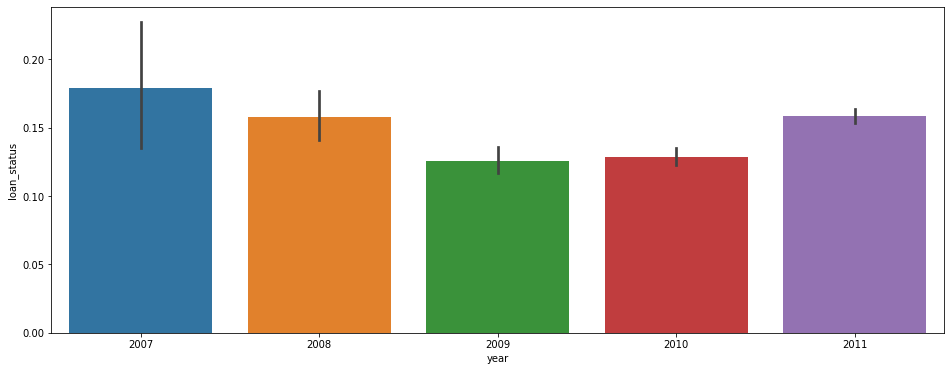

In [110]:
#observing the results in the above 2 cells, we see that the number of loan applicants are increasing along months and years
#plotting a graph for the year-wise analysis
cat_var_plot('year')

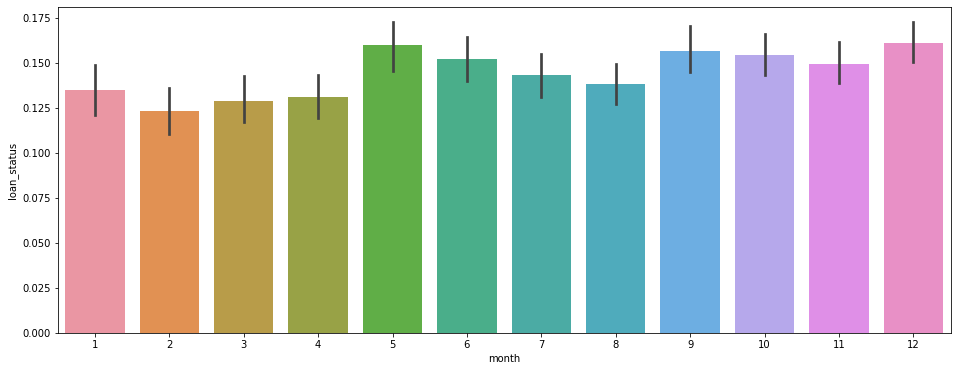

In [111]:
#month-wise graph
cat_var_plot('month')

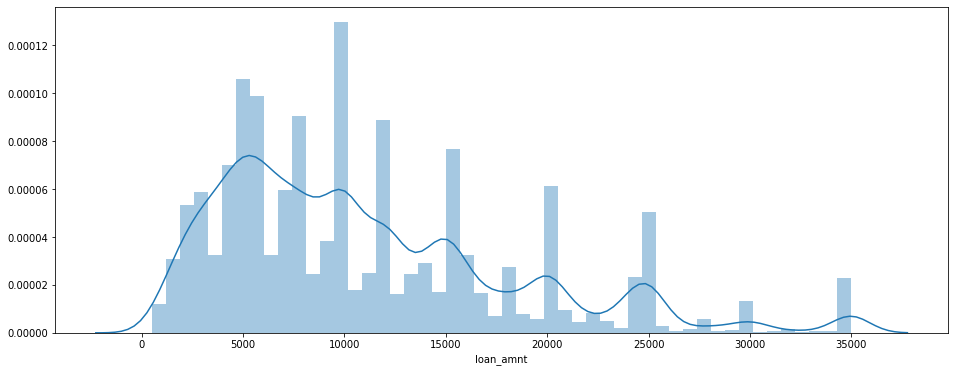

In [112]:
#distribution of loan data 
plt.figure(figsize=(16,6))
sns.distplot(loan_data['loan_amnt'],kde = True)
plt.show()

In [113]:
#binning up the loan amount into discrete categories as it is seen to vary as it is a continuous variable
# we can put them into 3 bins :  Low - <=5000, Medium - 5000 - 15000, High - 15000 - 25000 and very high- above 25000
def loan_amnt_bin(n):
    if(n<=5000):
        return 'Low'
    elif(n>5000 and n<=15000):
        return 'Medium'
    elif(n>15000 and n<=25000):
        return 'High'
    else:
        return 'Very High'
loan_data['loan_amnt'] = loan_data['loan_amnt'].apply(lambda x : loan_amnt_bin(x))
loan_data['loan_amnt']

0           Low
1           Low
2           Low
3        Medium
5           Low
          ...  
39712       Low
39713    Medium
39714       Low
39715       Low
39716    Medium
Name: loan_amnt, Length: 38577, dtype: object

In [114]:
loan_data['loan_amnt'].value_counts()

Medium       20485
Low           9472
High          7185
Very High     1435
Name: loan_amnt, dtype: int64

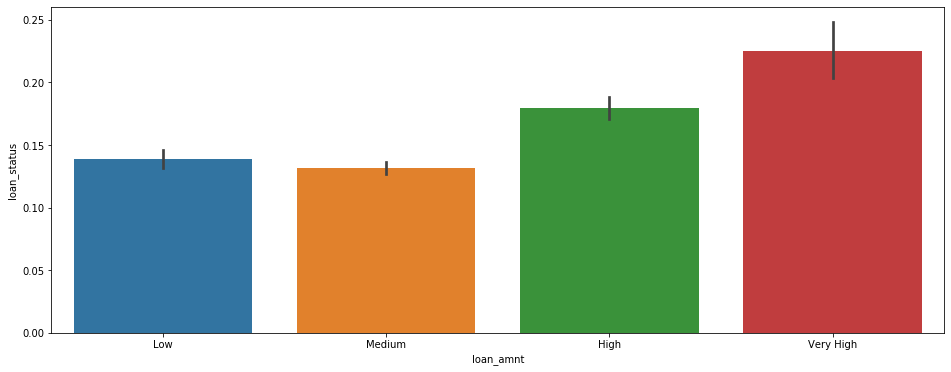

In [115]:
cat_var_plot('loan_amnt')
#higher the loan amount - higher the default rate

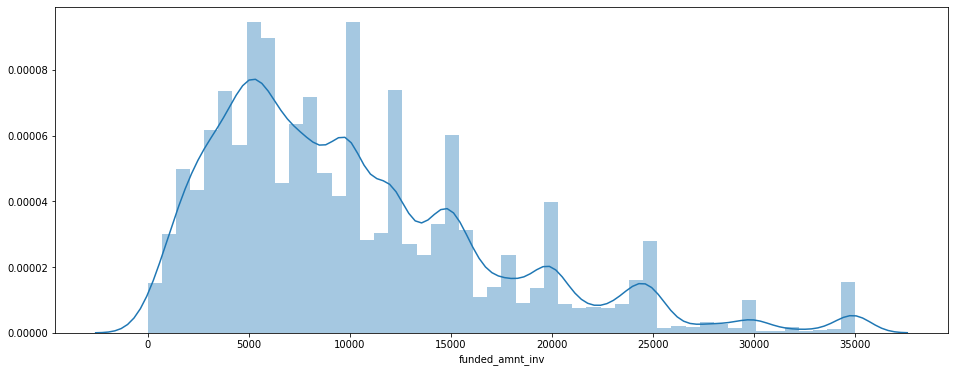

In [116]:
plt.figure(figsize=(16,6))
sns.distplot(loan_data['funded_amnt_inv'],kde = True)
plt.show()

In [117]:
# as the graph is similar to that of the loan_amnt , we can bin them into the same categories as loan_amnt
loan_data['funded_amnt_inv'] = loan_data['funded_amnt_inv'].apply(lambda x : loan_amnt_bin(x))
loan_data['funded_amnt_inv']

0           Low
1           Low
2           Low
3        Medium
5           Low
          ...  
39712       Low
39713       Low
39714       Low
39715       Low
39716       Low
Name: funded_amnt_inv, Length: 38577, dtype: object

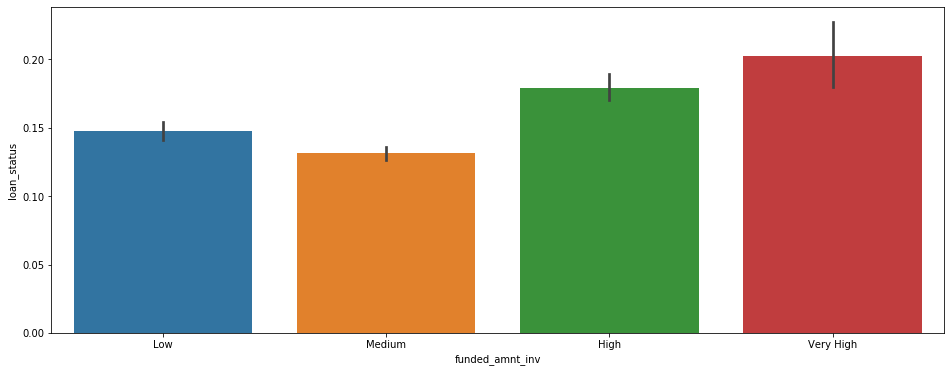

In [118]:
cat_var_plot('funded_amnt_inv')

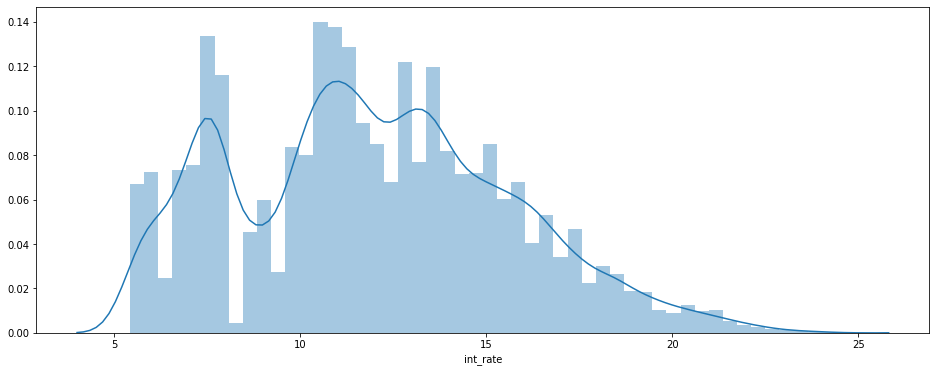

In [119]:
# checking out on interest rates
plt.figure(figsize=(16,6))
sns.distplot(loan_data['int_rate'],kde = True)
plt.show()

In [120]:
#binning int_rate
def loan_int_rate(n):
    if(n <= 10 ):
        return 'Low'
    elif (n > 10 and n <=15):
        return 'Medium'
    else:
        return 'High'
    
    
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x: loan_int_rate(x))
loan_data['int_rate'].value_counts()

Medium    18265
Low       12316
High       7996
Name: int_rate, dtype: int64

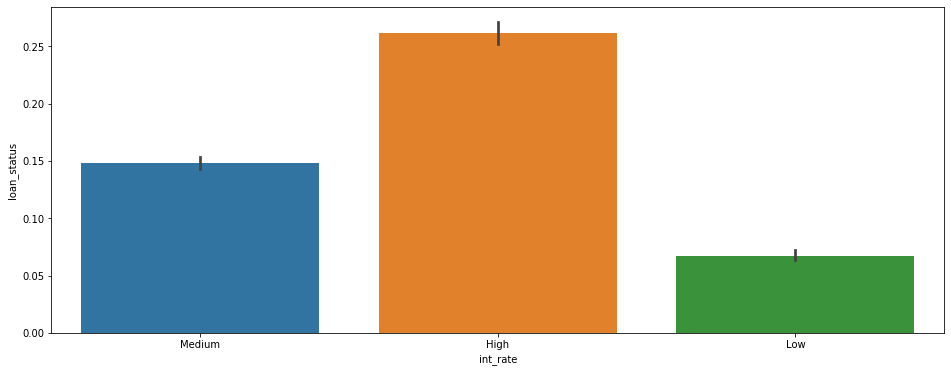

In [121]:
cat_var_plot('int_rate')

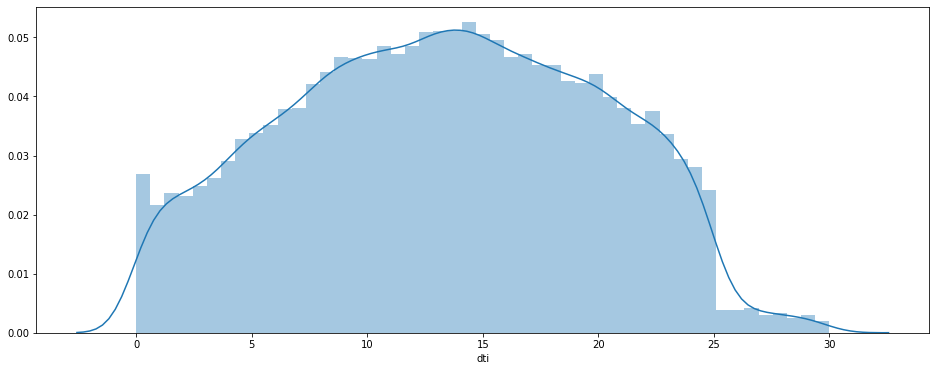

In [122]:
#debt to income ratio dti:
plt.figure(figsize=(16,6))
sns.distplot(loan_data['dti'],kde = True)
plt.show()

In [123]:
def loan_dti(n):
    if n <= 5:
        return 'Low'
    elif n > 5 and n <=20:
        return 'Medium'
    else:
        return 'High'
    

loan_data['dti'] = loan_data['dti'].apply(lambda x: loan_dti(x))

In [124]:
loan_data['dti'].value_counts()

Medium    26314
High       7201
Low        5062
Name: dti, dtype: int64

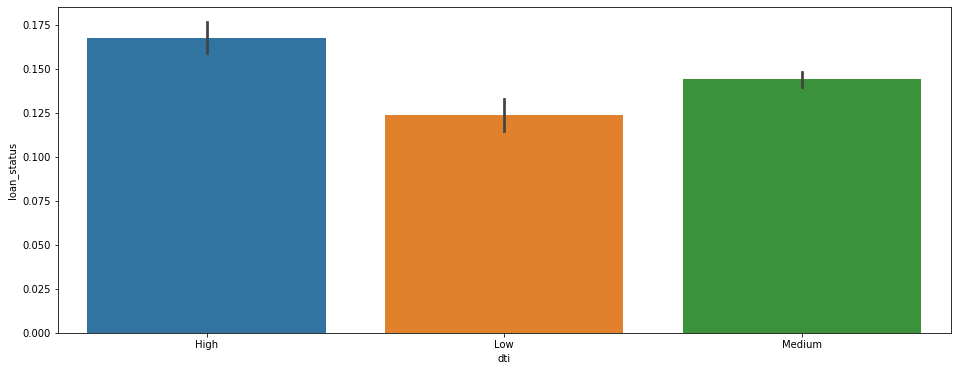

In [125]:
cat_var_plot('dti')

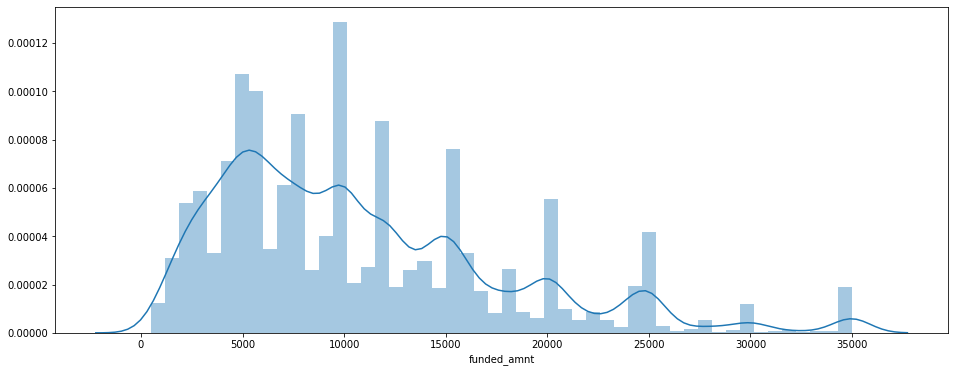

In [126]:
#funding amount:
plt.figure(figsize=(16,6))
sns.distplot(loan_data['funded_amnt'],kde = True)
plt.show()

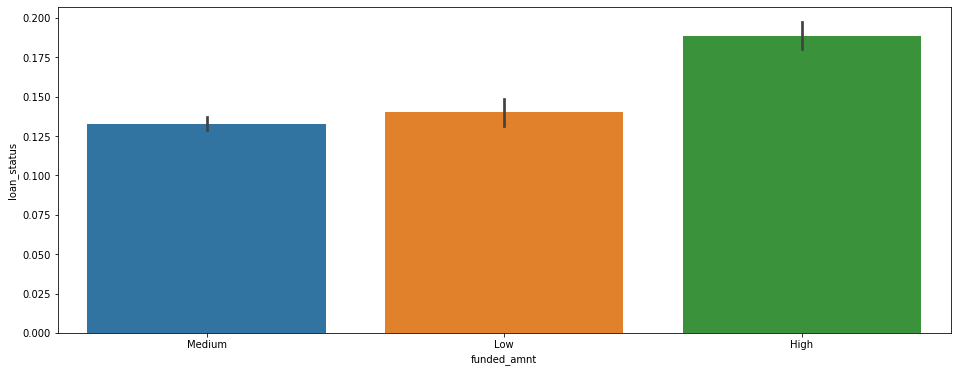

In [127]:
# funding amount
def loan_funded_amount(n):
    if n <= 4000:
        return 'Low'
    elif n > 4000 and n <=15000:
        return 'Medium'
    else:
        return 'High'
    
loan_data['funded_amnt'] = loan_data['funded_amnt'].apply(lambda x: loan_funded_amount(x))

cat_var_plot('funded_amnt')

In [128]:
loan_data['funded_amnt'].value_counts()

Medium    24258
High       8155
Low        6164
Name: funded_amnt, dtype: int64

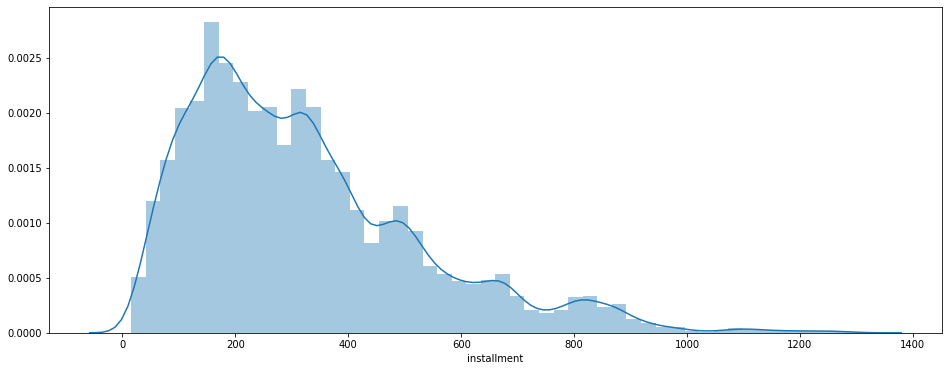

In [129]:
#installments:
plt.figure(figsize=(16,6))
sns.distplot(loan_data['installment'],kde = True)
plt.show()

In [130]:
def loan_installment(n):
    if n <= 200:
        return 'Low'
    elif n > 200 and n <=400:
        return 'Medium'
    elif n > 400 and n <=600:
        return 'High'
    else:
        return 'Very High'
    
loan_data['installment'] = loan_data['installment'].apply(lambda x: loan_installment(x))
loan_data['installment'].value_counts()

Medium       14732
Low          13074
High          6563
Very High     4208
Name: installment, dtype: int64

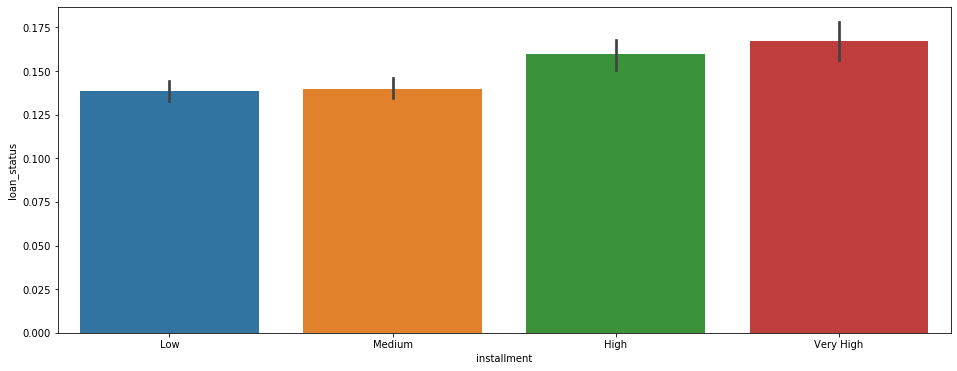

In [131]:
cat_var_plot('installment')

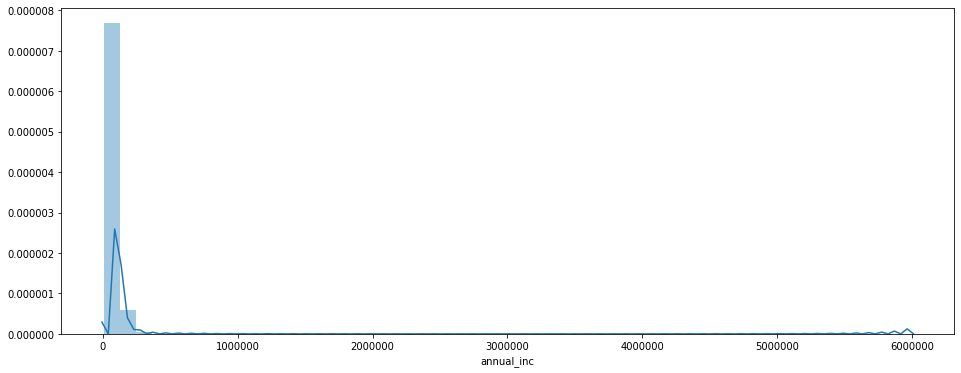

In [132]:
#annual income:
plt.figure(figsize=(16,6))
sns.distplot(loan_data['annual_inc'],kde = True)
plt.show()

In [133]:
def loan_annual_income(n):
    if n <= 50000:
        return 'Low'
    elif n > 50000 and n <=100000:
        return 'Medium'
    elif n > 100000 and n <=150000:
        return 'High'
    else:
        return 'Very High'

loan_data['annual_inc'] = loan_data['annual_inc'].apply(lambda x: loan_annual_income(x))

In [134]:
loan_data['annual_inc'].value_counts()

Medium       17707
Low          15389
High          3995
Very High     1486
Name: annual_inc, dtype: int64

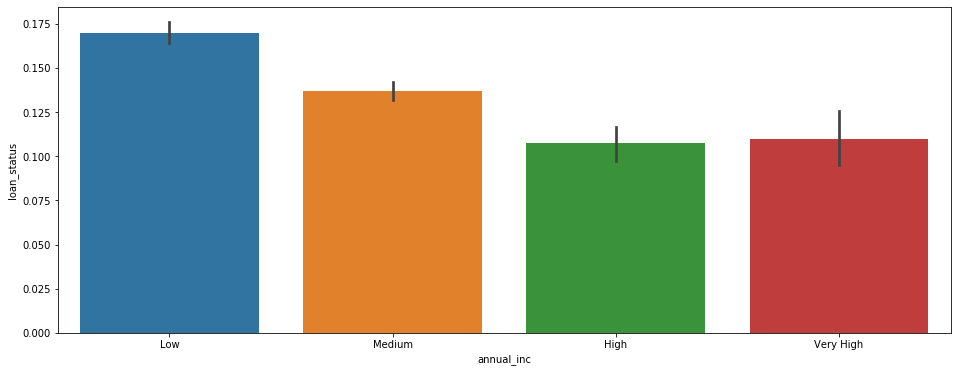

In [135]:
cat_var_plot('annual_inc')

In [136]:
# employment length
# first, let's drop the missing value observations in emp length
loan_data = loan_data[~loan_data['emp_length'].isnull()]


In [137]:
loan_data['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
5          3 years
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 37544, dtype: object

In [138]:
import re
loan_data['emp_length'] = loan_data['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
loan_data['emp_length'] = loan_data['emp_length'].apply(lambda x: pd.to_numeric(x))
loan_data['emp_length']

0        10
1         1
2        10
3        10
5         3
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 37544, dtype: int64

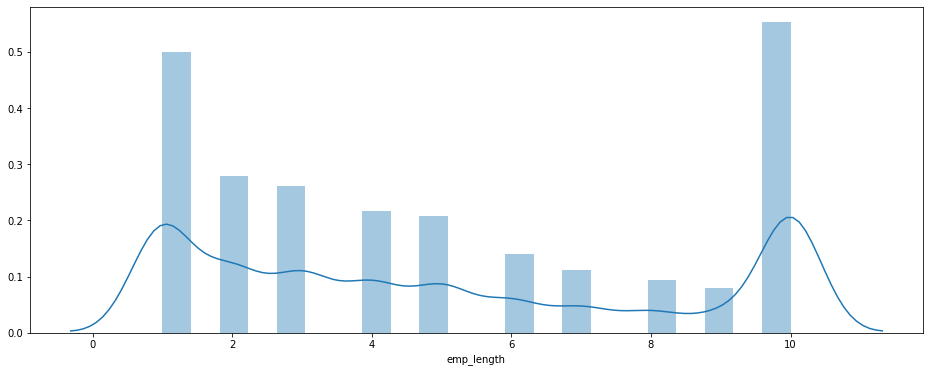

In [139]:
# emp_length:
plt.figure(figsize=(16,6))
sns.distplot(loan_data['emp_length'],kde = True)
plt.show()

In [140]:
def loan_emp_length(n):
    if n <= 1:
        return 'Fresher'
    elif n > 1 and n <=3:
        return 'Junior'
    elif n > 3 and n <=8:
        return 'Senior'
    else:
        return 'Expert'

loan_data['emp_length'] = loan_data['emp_length'].apply(lambda x: loan_emp_length(x))

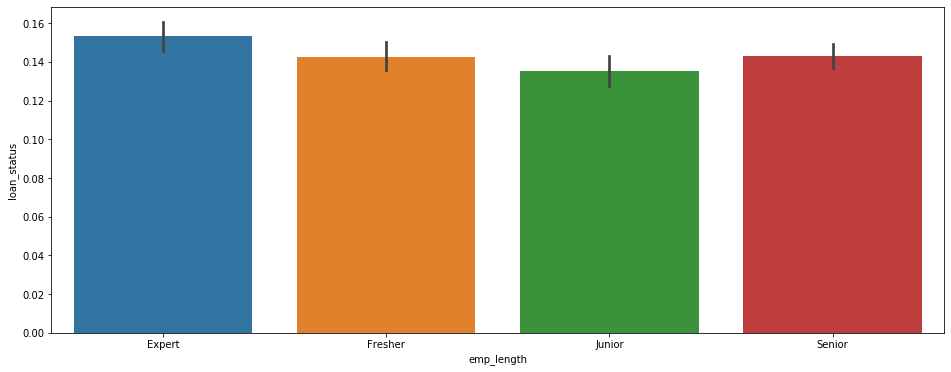

In [141]:
cat_var_plot('emp_length')

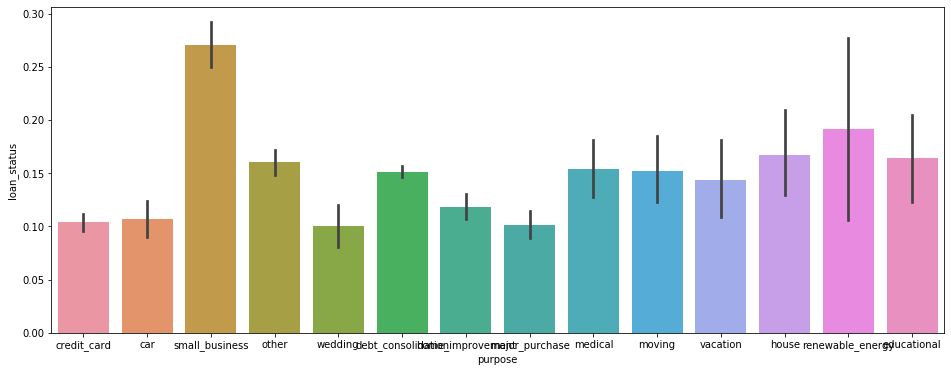

In [142]:
#segmented univariate analysis
cat_var_plot('purpose')

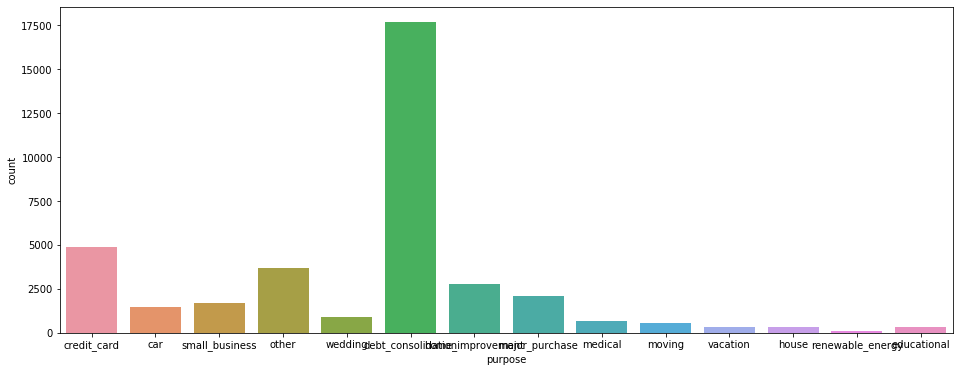

In [143]:
# step 1: consider the number of loans for each type (purpose) of the loan
# most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.
plt.figure(figsize=(16, 6))
sns.countplot(x='purpose', data=loan_data)
plt.show()

In [144]:

loan_data['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: purpose, dtype: int64

In [145]:
# filtering the data for the purpose -excluding other as the purpose is not clear
main_purpose = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
loan_data = loan_data[loan_data['purpose'].isin(main_purpose)]

In [146]:
loan_data['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

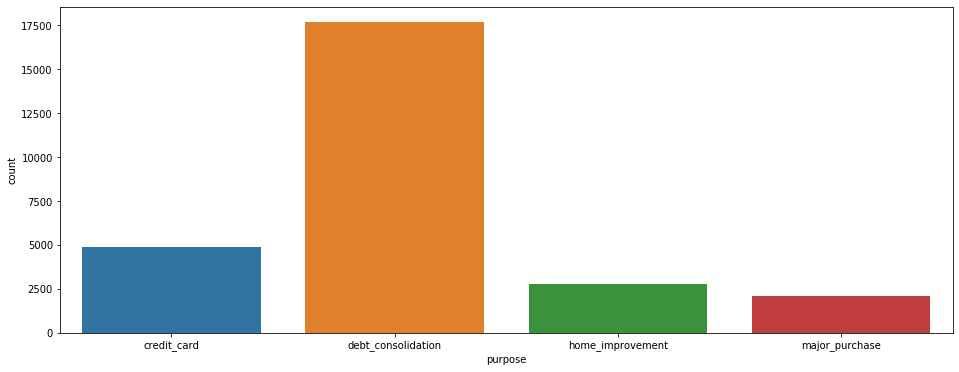

In [147]:
# plotting number of loans by purpose
plt.figure(figsize=(16,6))
sns.countplot(x=loan_data['purpose'])
plt.show()

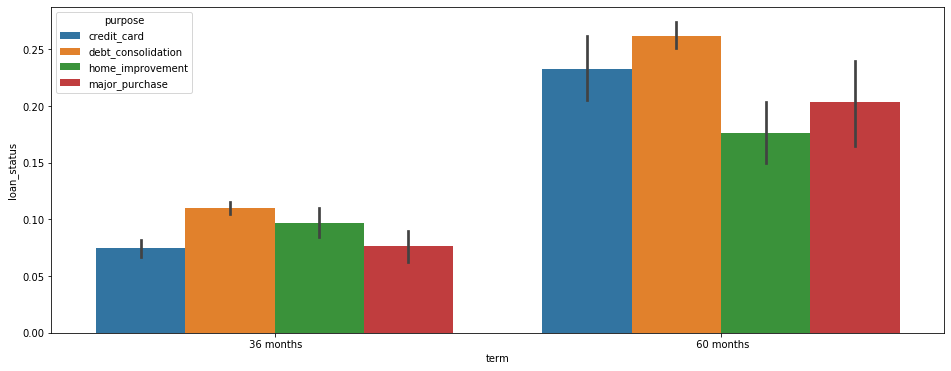

In [148]:
# let's now compare the default rates across two types of categorical variables
# purpose of loan (constant) and another categorical variable (which changes)

plt.figure(figsize=(16, 6))
sns.barplot(x='term', y="loan_status", hue='purpose', data=loan_data)
plt.show()

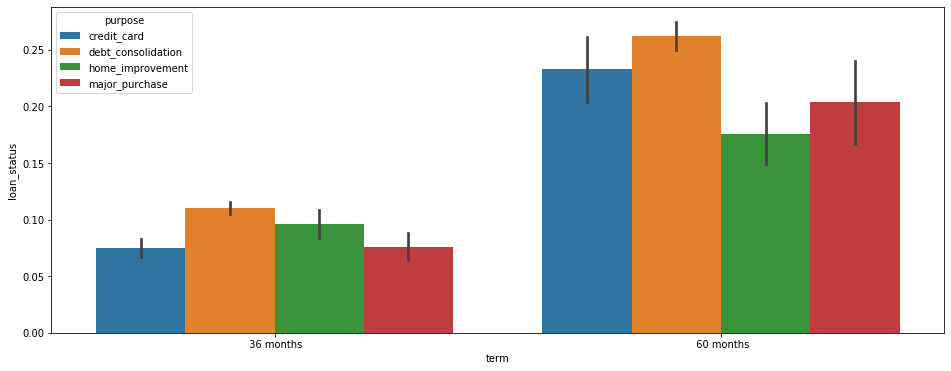

In [149]:
#Generic function which takes a categorical variable and plots the default rate
#segmented by purpose 

def cat_plot_segmented(cat_var):
    plt.figure(figsize=(16, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=loan_data)
    plt.show()

    
cat_plot_segmented('term')



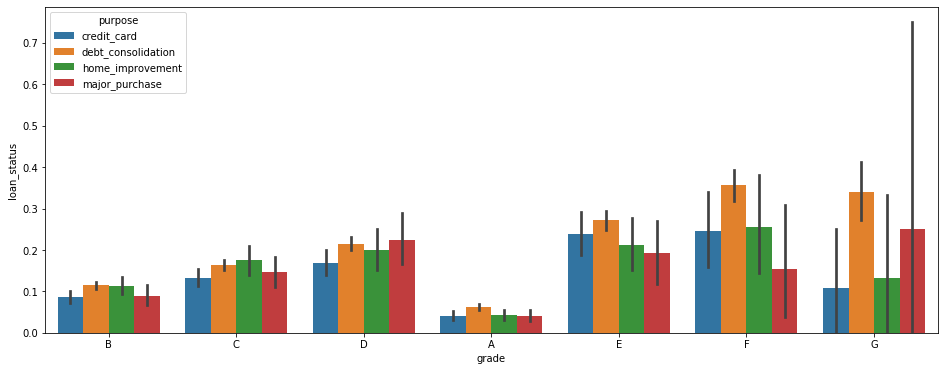

In [150]:
cat_plot_segmented('grade')

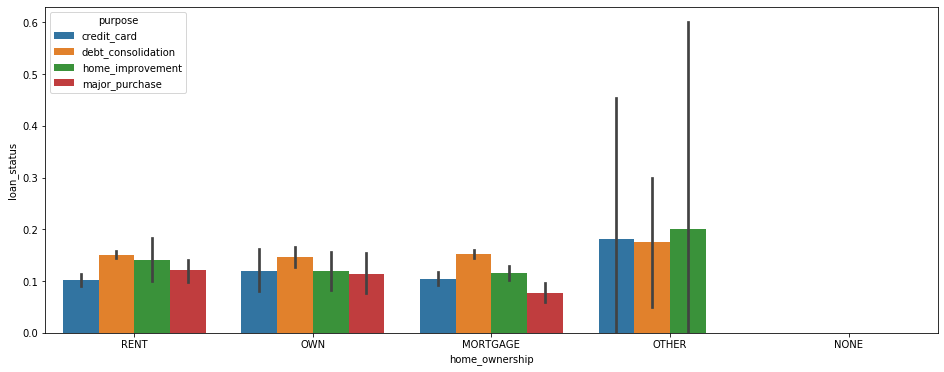

In [151]:
cat_plot_segmented('home_ownership')

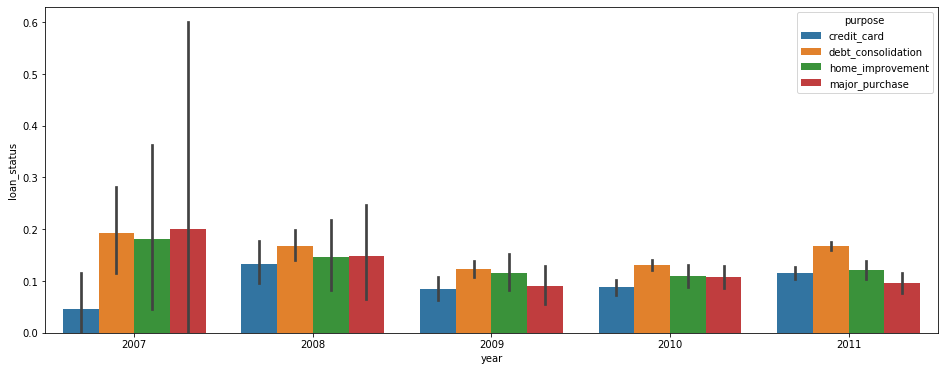

In [152]:
cat_plot_segmented('year')

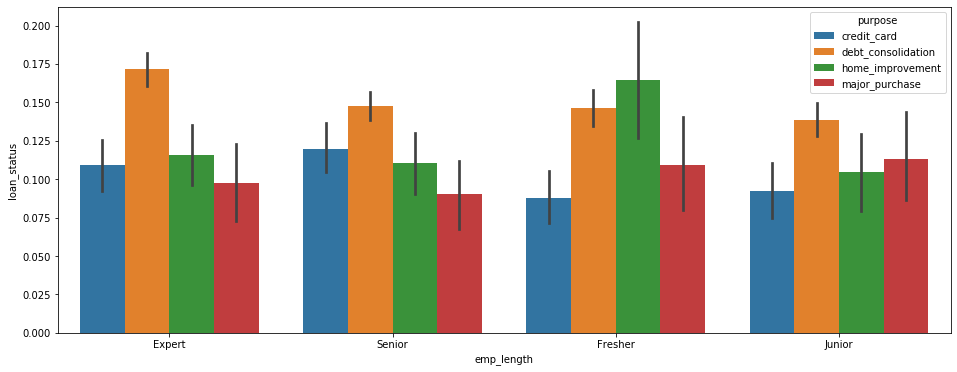

In [153]:
cat_plot_segmented('emp_length')

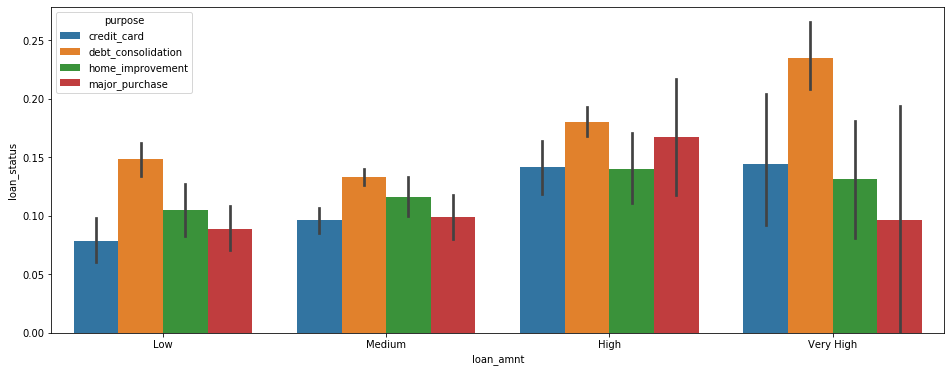

In [154]:
cat_plot_segmented('loan_amnt')

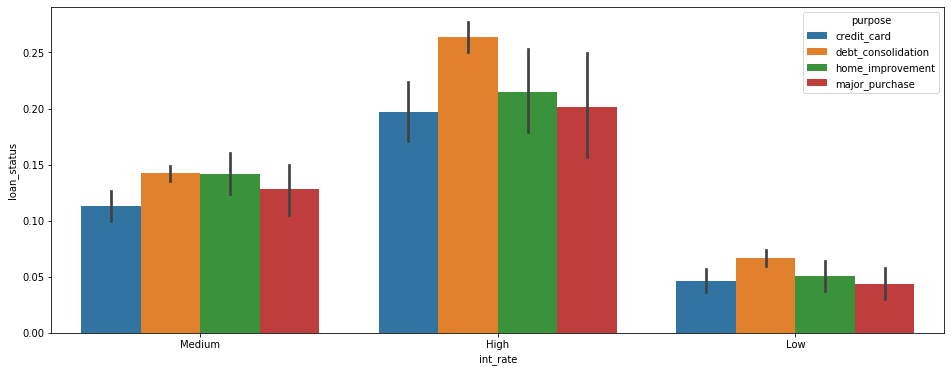

In [155]:
cat_plot_segmented('int_rate')

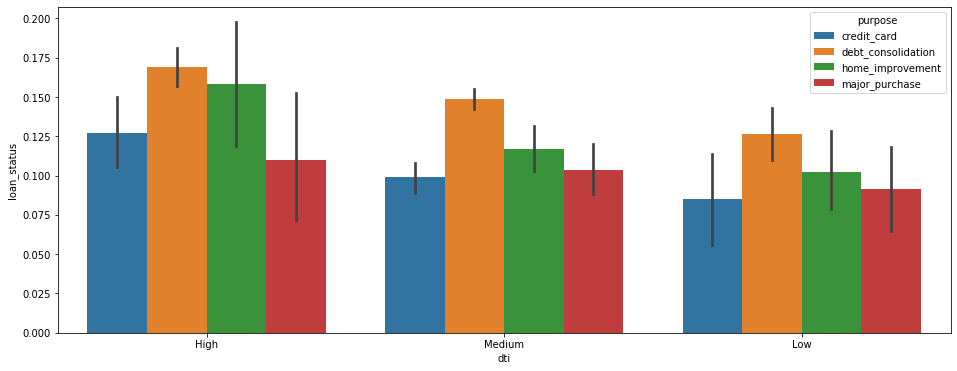

In [156]:
cat_plot_segmented('dti')

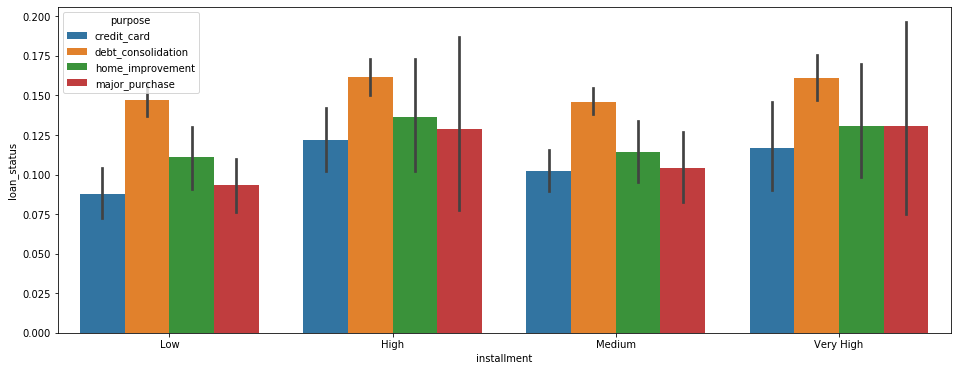

In [157]:
cat_plot_segmented('installment')

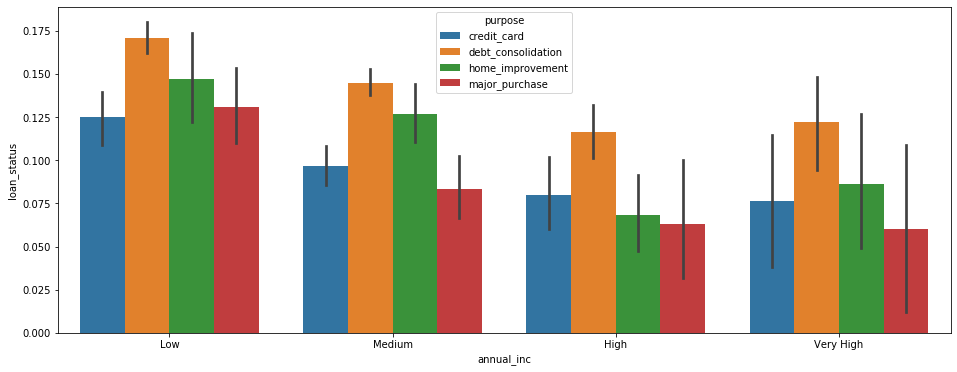

In [158]:
cat_plot_segmented('annual_inc')

In [160]:
loan_data.groupby('annual_inc').loan_status.mean().sort_values(ascending=False)

annual_inc
Low          0.157966
Medium       0.130075
Very High    0.101570
High         0.097749
Name: loan_status, dtype: float64

In [161]:
#computing the 'difference between the highest and the lowest default rate' across the categories


def diff_rate(cat_var):
    default_rates = loan_data.groupby(cat_var).loan_status.mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))

default_rates, diff = diff_rate('annual_inc')
print(default_rates) 
print(diff)

annual_inc
Low          0.16
Medium       0.13
Very High    0.10
High         0.10
Name: loan_status, dtype: float64
0.06


In [167]:
# filtering all the object type variables
categorical_df = loan_data.loc[:, loan_data.dtypes == object]
categorical_df['loan_status'] = loan_data['loan_status']

# Now, for each variable, we can compute the incremental diff in default rates


F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [166]:
cols = [i for i in loan_data.columns]
print(cols)

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'dti', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'month', 'year']


In [165]:

# storing the diff of default rates for each column in a dict
d = {key: diff_rate(key)[1]*100 for key in categorical_df.columns if key != 'loan_status'}
print(d)

{'loan_amnt': 8.0, 'funded_amnt': 5.0, 'funded_amnt_inv': 6.0, 'term': 15.0, 'int_rate': 19.0, 'installment': 3.0, 'grade': 27.0, 'sub_grade': 46.0, 'emp_title': 100.0, 'emp_length': 2.0, 'home_ownership': 16.0, 'annual_inc': 6.0, 'verification_status': 4.0, 'pymnt_plan': 0.0, 'purpose': 5.0, 'dti': 5.0, 'initial_list_status': 0.0, 'application_type': 0.0}


In [168]:
 loan_data.to_csv("F:\\upgrad\\LendingClubCaseStudy\\loan\\Loan_Data.csv")
  
